First 5 Rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Dataset Shape: (200, 5)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

M

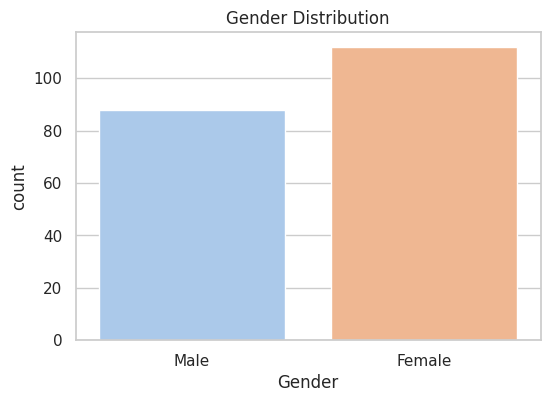

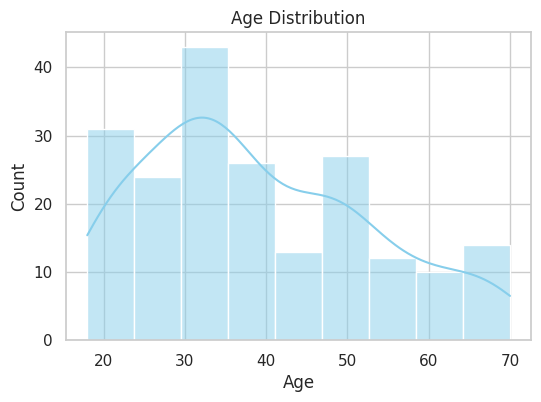

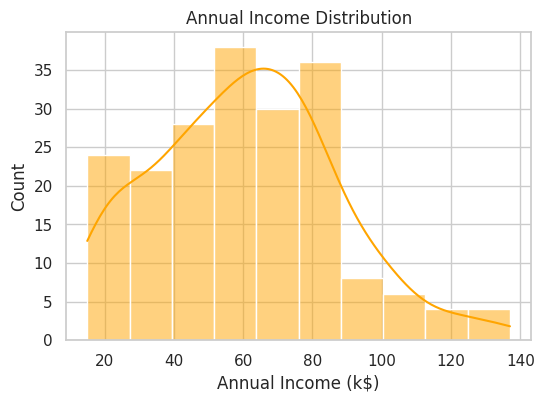

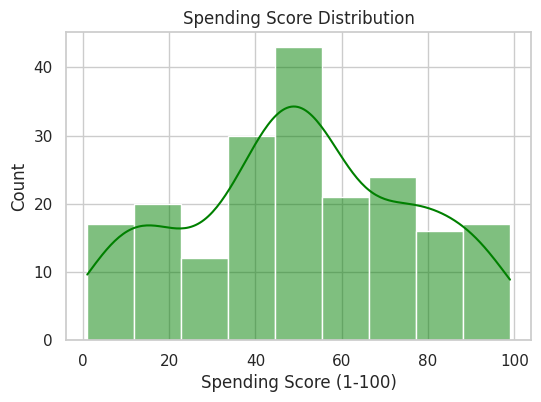

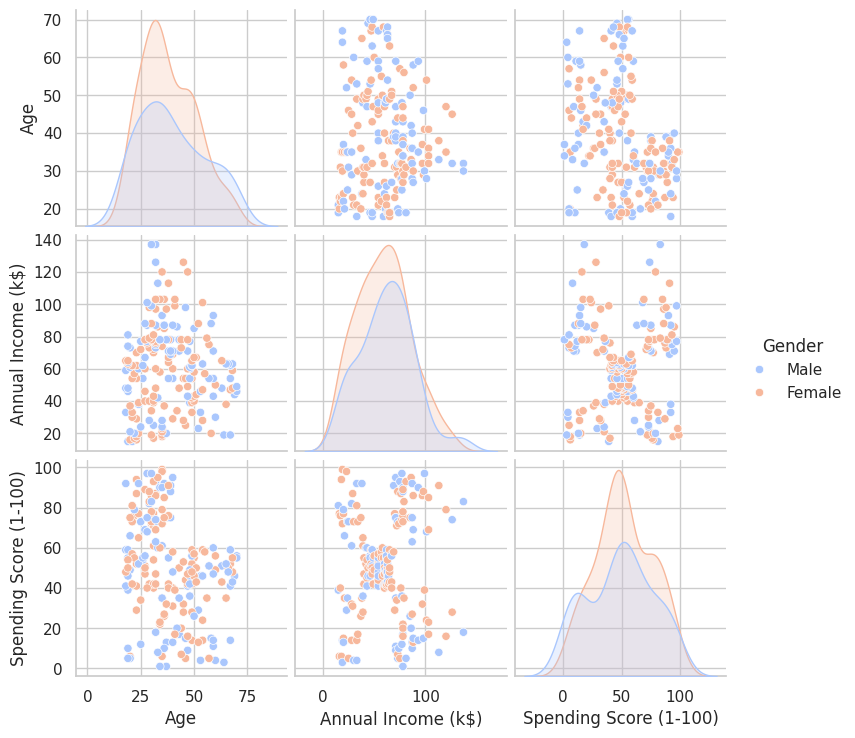

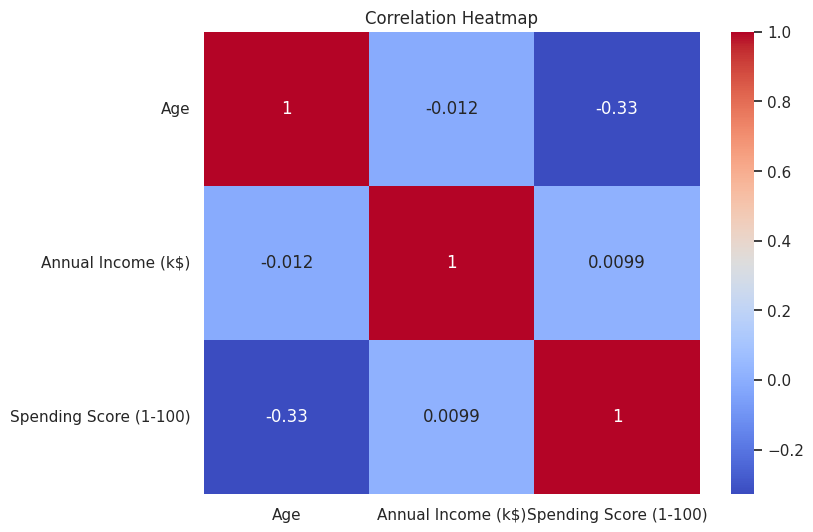

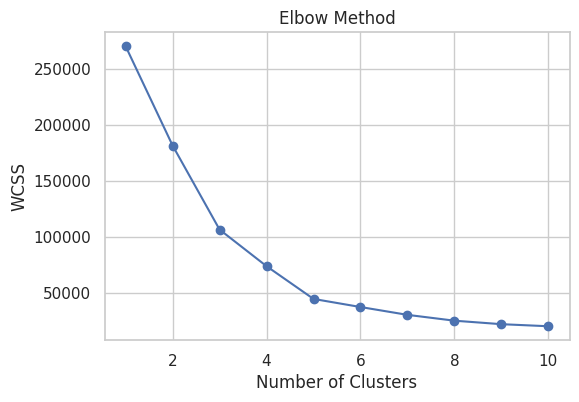

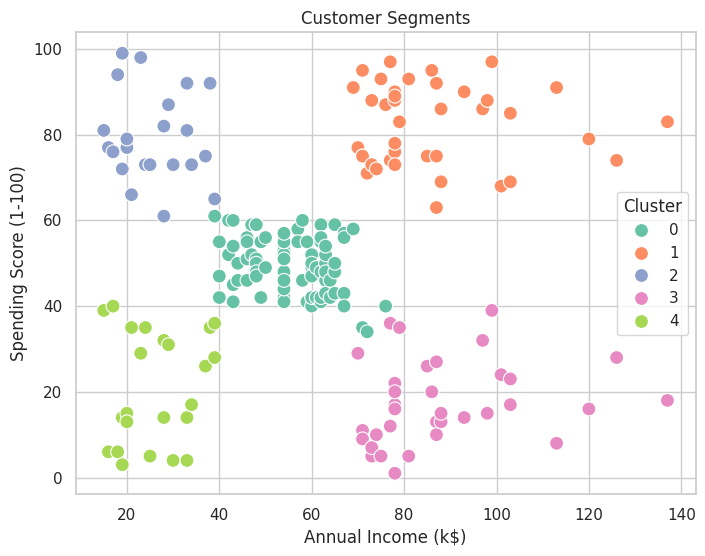

In [14]:
# Mall Customers Dataset Analysis

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("Mall_Customers[1].csv")

# Step 3: Basic Info
print("First 5 Rows:\n", df.head(), "\n")
print("Dataset Shape:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Step 4: Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title("Gender Distribution")
plt.show()

# Step 5: Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

# Step 6: Annual Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], kde=True, color='orange')
plt.title("Annual Income Distribution")
plt.show()

# Step 7: Spending Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title("Spending Score Distribution")
plt.show()

# Step 8: Pair Plot for Numerical Features
sns.pairplot(df.drop(columns=['CustomerID']), hue='Gender', palette='coolwarm')
plt.show()

# Step 9: Correlation Heatmap
plt.figure(figsize=(8,6))
# Drop the 'Gender' column as it is not numerical
sns.heatmap(df.drop(columns=['CustomerID', 'Gender']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 10: Clustering (K-Means Example)
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Finding Optimal Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # Added n_init
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Final KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10) # Added n_init
df['Cluster'] = kmeans.fit_predict(X)

# Visualizing Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments")
plt.show()